# Testing cross-validation

This notebook shows some examples of cross validation

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

In [6]:

#------------------------------------------------------------
# Generate data - see http://www.astroml.org/book_figures/chapter8/fig_gp_mu_z.html
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = Cosmology()
z = np.linspace(0.01, 2, 1000)
mu_true = np.asarray(map(cosmo.mu, z))


        Use astropy.cosmology instead. [warnings]


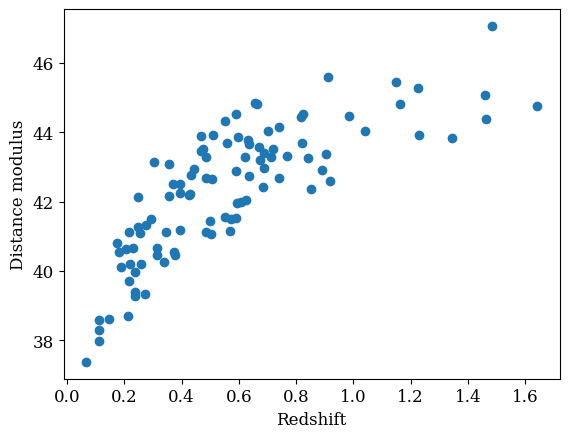

In [7]:
plt.scatter(z_sample, mu_sample)
plt.xlabel('Redshift')
plt.ylabel('Distance modulus')
plt.savefig('/Users/jarle/Documents/CAUP/Teaching/Databases & Data Mining/2019/Lectures/Lecture 2/sample-for-cv-illustration-nodivision.pdf')

## Select a test and a training set

In [8]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(mu_sample), dtype=int)
i_train, i_test = train_test_split(indices)

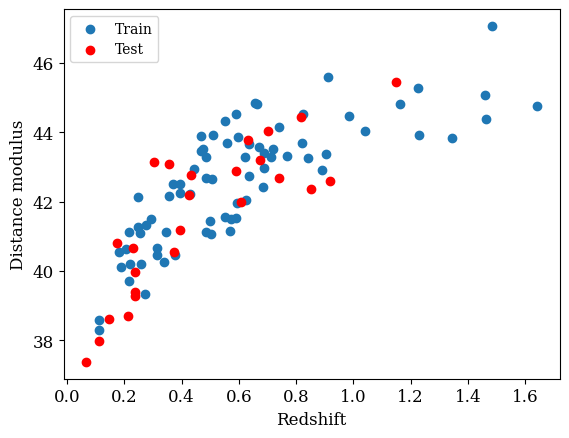

In [9]:
plt.scatter(z_sample[i_train], mu_sample[i_train], label='Train')
plt.scatter(z_sample[i_test], mu_sample[i_test], color='red', label='Test')
plt.xlabel('Redshift')
plt.ylabel('Distance modulus')
plt.legend()
plt.savefig('/Users/jarle/Documents/CAUP/Teaching/Databases & Data Mining/2019/Lectures/Lecture 2/sample-for-cv-illustration.pdf')

## Fit a series of polynomials

We now fit polynomials and look how well the model fit the training data, and calculate how well it works for the test data.

In [10]:
n_orders = 15
orders = np.arange(n_orders)

MSE_train = np.zeros(n_orders)
MSE_test = np.zeros(n_orders)
BIC = np.zeros(n_orders)
AIC = np.zeros(n_orders)

best_fit = []

for i, order in enumerate(orders):
    # Fit the training sample using polyfit
    p = np.polyfit(z_sample[i_train], mu_sample[i_train], order)
    best_fit.append(p)
    
    # Calculate the best fit on the training sample
    mu_fit_train = np.polyval(p, z_sample[i_train])
    MSE_train[i] = np.sum((mu_sample[i_train]-mu_fit_train)**2)/len(i_train)
    
    # Calculate the best fit on the test sample
    mu_fit_test = np.polyval(p, z_sample[i_test])
    MSE_test[i] = np.sum((mu_sample[i_test]-mu_fit_test)**2)/len(i_test)
    
    BIC[i] = 2*MSE_test[i] + order*np.log10(len(i_test))
    AIC[i] = 2*order + 2*MSE_test[i]
    

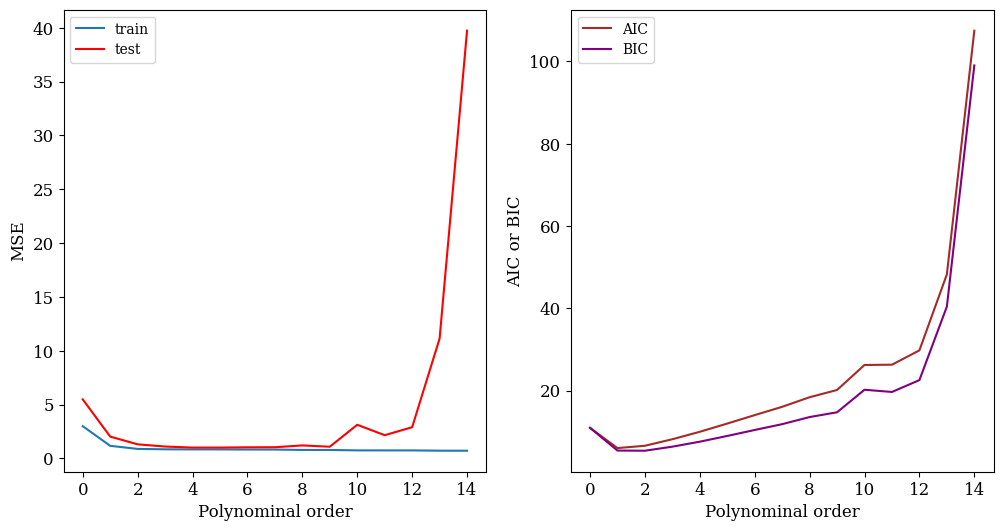

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].plot(orders, MSE_train, label='train')
ax[0].plot(orders, MSE_test, color='red', label='test')
ax[0].legend()
ax[0].set_xlabel('Polynominal order')
ax[0].set_ylabel('MSE')
ax[1].plot(orders, AIC, color='brown', label='AIC')
ax[1].plot(orders, BIC, color='purple', label='BIC')
ax[1].legend()
ax[1].set_xlabel('Polynominal order')
ax[1].set_ylabel('AIC or BIC')

plt.savefig('/Users/jarle/Documents/CAUP/Teaching/Databases & Data Mining/2019/Lectures/Lecture 2/cv-illustration.pdf')

In [12]:
n_min = np.argmin(MSE_test)
print("The smallest test error happens for n={0}".format(orders[n_min]))

The smallest test error happens for n=4


In [13]:
n_min_BIC = np.argmin(BIC)
n_min_AIC = np.argmin(AIC)
print("The smallest BIC happens for n={0} and for AIC={1}".format(orders[n_min_BIC], orders[n_min_AIC]))

The smallest BIC happens for n=2 and for AIC=1


## Show the best fit



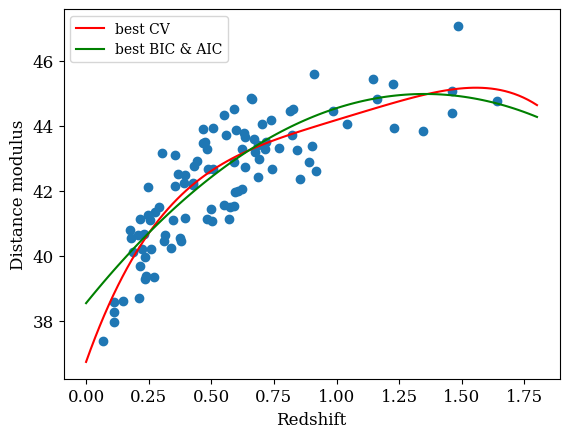

In [16]:
z_plot = np.linspace(0, 1.8, 100)
p_best_CV = best_fit[orders[n_min]]
p_best_BIC = best_fit[orders[n_min_BIC]]
p_best_AIC = best_fit[orders[n_min_AIC]]

mu_best_CV = np.polyval(p_best_CV, z_plot)
mu_best_BIC = np.polyval(p_best_BIC, z_plot)
mu_best_AIC = np.polyval(p_best_AIC, z_plot)

plt.scatter(z_sample, mu_sample)
plt.plot(z_plot, mu_best_CV, color='red', label='best CV')
plt.plot(z_plot, mu_best_BIC, color='green', label='best BIC & AIC')
plt.xlabel('Redshift')
plt.ylabel('Distance modulus')
plt.legend()
plt.savefig('/Users/jarle/Documents/CAUP/Teaching/Databases & Data Mining/2024/Lecture 2/cv-illustration-comp-fit.pdf')